In [1]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from model import DCGAN_G, DCGAN_D, Test_D
import util
import constant
from AI_final_project.dataset import QDDataSet
%matplotlib inline

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


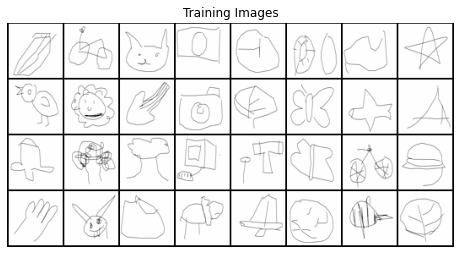

In [2]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = QDDataSet(constant.dataroot)
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=constant.batch_size,
                                         shuffle=True, num_workers=constant.workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and constant.ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [3]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [4]:
# Create the generator
netG = DCGAN_G().to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (constant.ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

# Create the Discriminator
netD = DCGAN_D().to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (constant.ngpu > 1):
    netD = nn.DataParallel(netD, list(range(constant.ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

DCGAN_G(
  (generator): Sequential(
    (0): ConvTranspose2d(130, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
    (12): ConvTr

In [10]:
# Initialize BCELoss function
#criterion = nn.BCELoss()
criterion = nn.BCELoss()
# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, constant.nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = torch.full((constant.batch_size,), 1, dtype=torch.float, device=device)
real_label_smooth = torch.full((constant.batch_size,), 0.9, dtype=torch.float, device=device)
fake_label = torch.full((constant.batch_size,), 0, dtype=torch.float, device=device)

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=constant.lr, betas=(constant.beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=constant.lr, betas=(constant.beta1, 0.999))

## Training part 

Starting Training Loop...
[0/30][0/2812]	Loss_D: 1.1203	Loss_G: 5.2129	D(x): 0.3341	D(G(z)): 0.0051 / 0.0067
cake


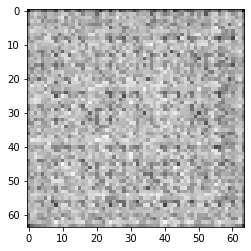

[0/30][200/2812]	Loss_D: 0.5370	Loss_G: 2.3121	D(x): 0.7210	D(G(z)): 0.0878 / 0.1034
hat


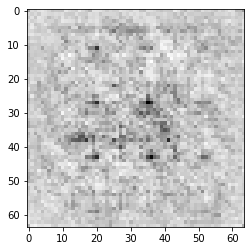

[0/30][400/2812]	Loss_D: 0.7994	Loss_G: 1.4682	D(x): 0.4897	D(G(z)): 0.0278 / 0.2436
ear


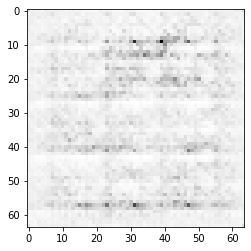

[0/30][600/2812]	Loss_D: 0.4215	Loss_G: 3.1465	D(x): 0.7973	D(G(z)): 0.0328 / 0.0493
hamburger


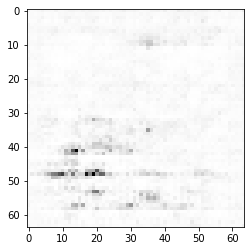

[0/30][800/2812]	Loss_D: 0.8046	Loss_G: 1.5146	D(x): 0.4894	D(G(z)): 0.0148 / 0.2462
lion


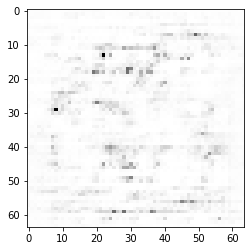

[0/30][1000/2812]	Loss_D: 0.3788	Loss_G: 4.9706	D(x): 0.9240	D(G(z)): 0.0383 / 0.0080
bee


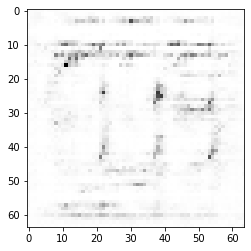

[0/30][1200/2812]	Loss_D: 0.4192	Loss_G: 3.8229	D(x): 0.7672	D(G(z)): 0.0085 / 0.0249
cat


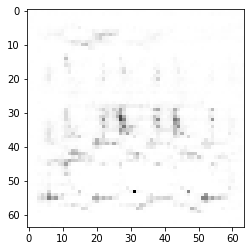

[0/30][1400/2812]	Loss_D: 0.3811	Loss_G: 4.4040	D(x): 0.8742	D(G(z)): 0.0236 / 0.0135
lion


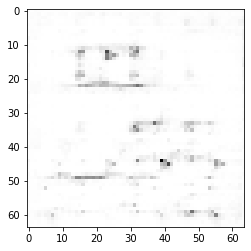

[0/30][1600/2812]	Loss_D: 0.4014	Loss_G: 4.2521	D(x): 0.7923	D(G(z)): 0.0123 / 0.0155
rabbit


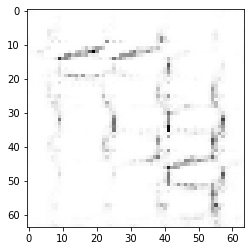

[0/30][1800/2812]	Loss_D: 0.4086	Loss_G: 3.5675	D(x): 0.7824	D(G(z)): 0.0175 / 0.0325
chair


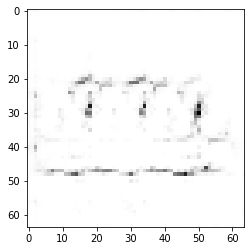

[0/30][2000/2812]	Loss_D: 0.3759	Loss_G: 8.7257	D(x): 0.9616	D(G(z)): 0.0037 / 0.0002
bird


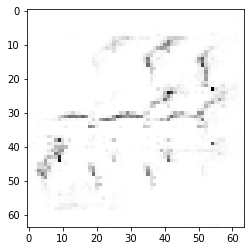

[0/30][2200/2812]	Loss_D: 0.4736	Loss_G: 3.3090	D(x): 0.6899	D(G(z)): 0.0031 / 0.0419
cat


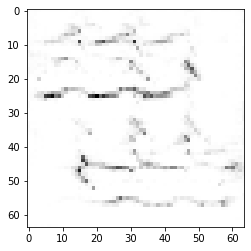

[0/30][2400/2812]	Loss_D: 0.3961	Loss_G: 3.4411	D(x): 0.7732	D(G(z)): 0.0061 / 0.0388
bee


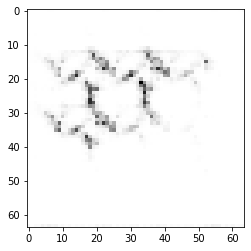

In [ ]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
num_epochs = 30
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        
        if len(data[0]) != constant.batch_size:
            continue
        
        data, class_label_raw = data
        data /= 255
        class_label = util.one_hot_encode(class_label_raw.numpy())
        class_label = torch.from_numpy(class_label)
        class_label = class_label.type(torch.float)
        netD.zero_grad()
        # Format batch
        real_cpu = data.to(device)
        real_cpu2 = class_label.to(device)    
        b_size = real_cpu.size(0)
        # Forward pass real batch through D
        output = netD(real_cpu, real_cpu2).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, real_label_smooth)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, constant.nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise, real_cpu2)
        # Classify all fake batch with D
        output = netD(fake.detach(), real_cpu2).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, fake_label)
        # Calculate the gradients for this batch
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Add the gradients from the all-real and all-fake batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake, real_cpu2).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, real_label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 200 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            with torch.no_grad():
                img_fake = fake.cpu()
                a = class_label_raw.cpu().numpy()[0]
                print(util.get_class_name(a))
                plt.imshow(img_fake[0][0], cmap='gray')
                plt.show()

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
#         if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
#             with torch.no_grad():
#                 fake = netG(constant.batch_size, real_cpu2).detach().cpu()
#             img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

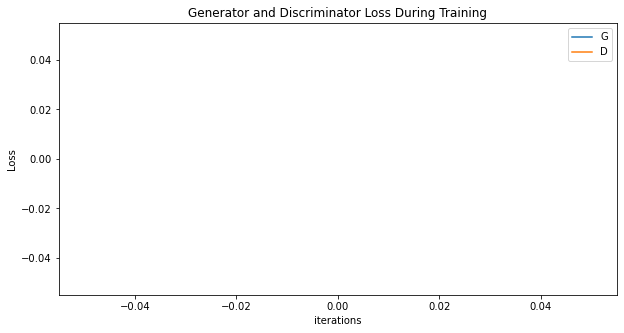

In [7]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()